In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set(rc={'figure.figsize':(12,10)})

In [3]:
data = pd.read_csv("titanic_data.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Numerical Value Analysis

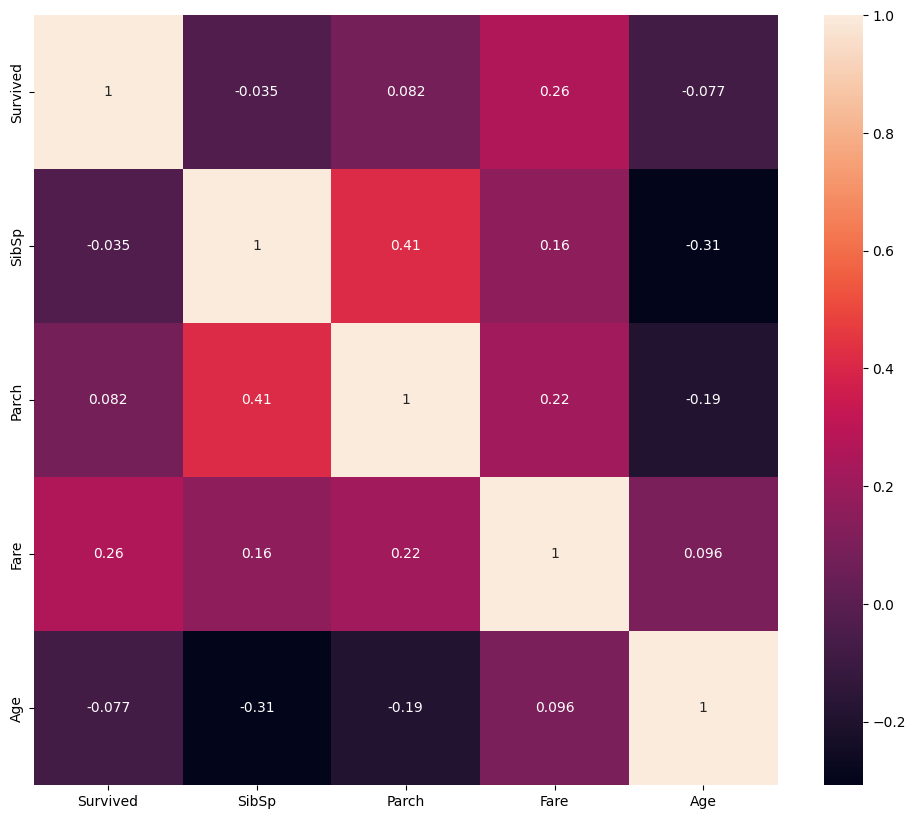

In [8]:
plt.figure(figsize = (12,10))
heatmap = sns.heatmap(data[["Survived", "SibSp", "Parch", "Fare", "Age" ]].corr(), annot = True)

### <font color = "green"> SibSp =  Number of siblings/spouses aboard the Titanic </font>

In [10]:
data['SibSp'].nunique()

7

In [11]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

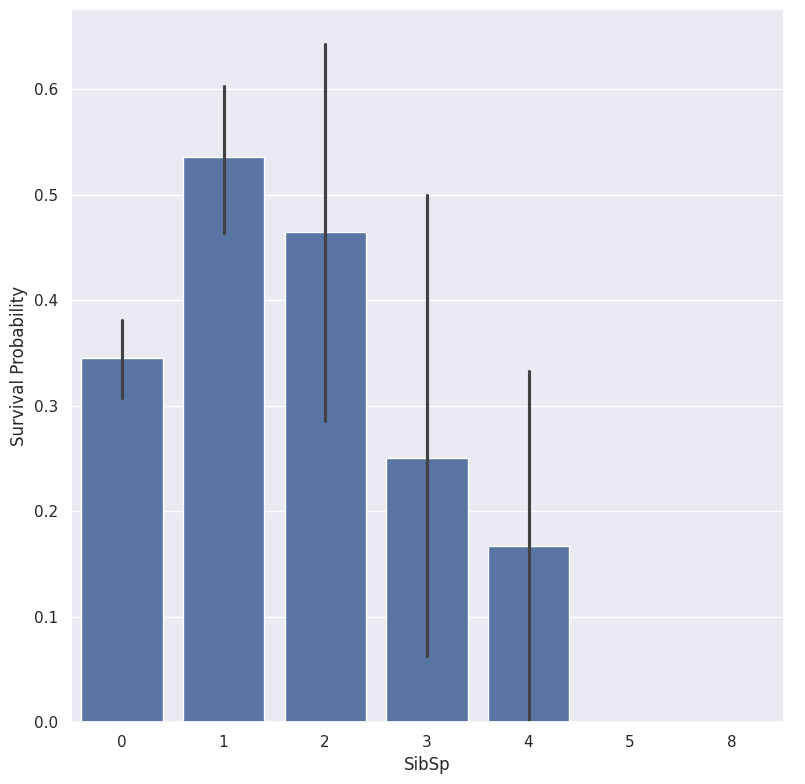

In [23]:
sns.catplot(x = "SibSp", y = "Survived", data = data, kind = "bar", height = 8).set_ylabels("Survival Probability")

### Age

/home/azureuser/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/azureuser/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args,

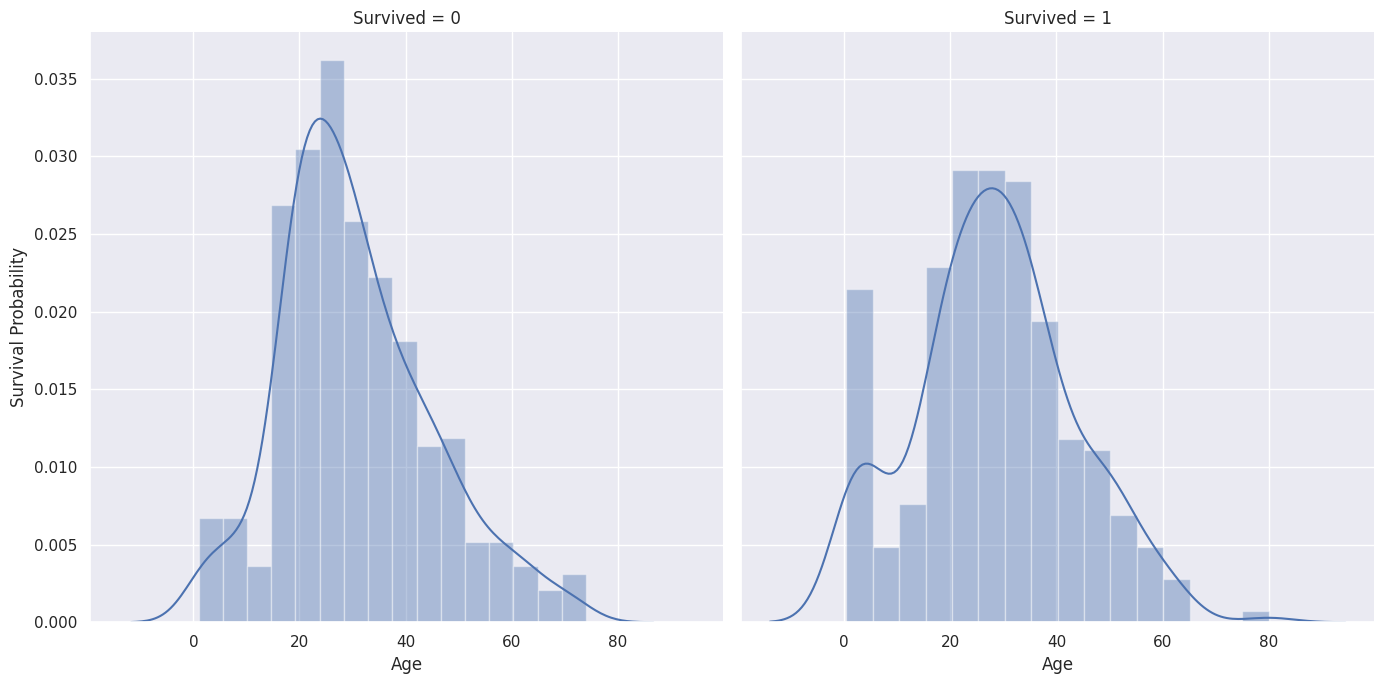

In [24]:
age_visual = sns.FacetGrid(data, col = "Survived", height = 7)
age_visual = age_visual.map(sns.distplot, "Age").set_ylabels("Survival Probability")

### Sex

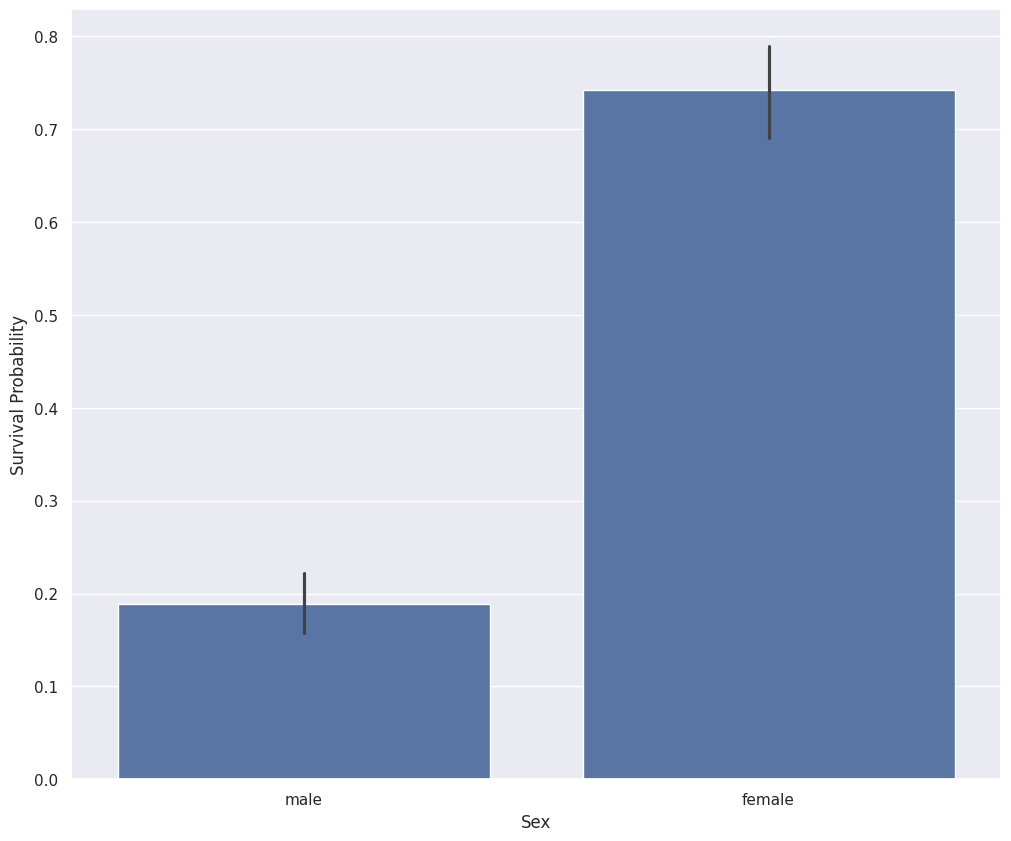

In [25]:
age_plot = sns.barplot(x="Sex", y = "Survived", data = data).set_ylabel("Survival Probability")

In [26]:
data[["Sex", "Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


### PClass

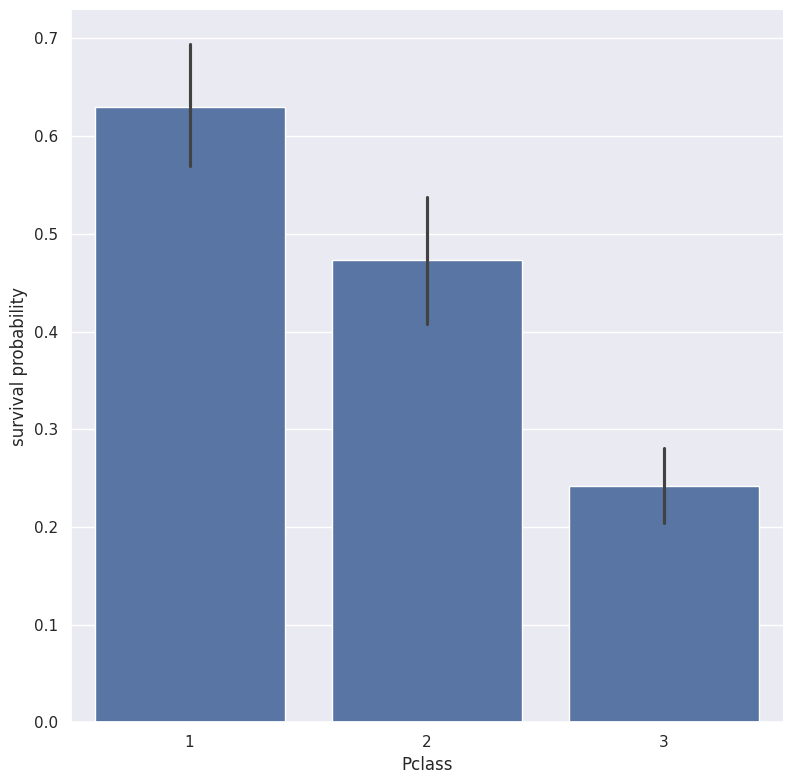

In [29]:
pclass = sns.catplot(x = "Pclass", y = "Survived", data = data, kind = "bar" , height= 8)
pclass = pclass.set_ylabels("survival probability")

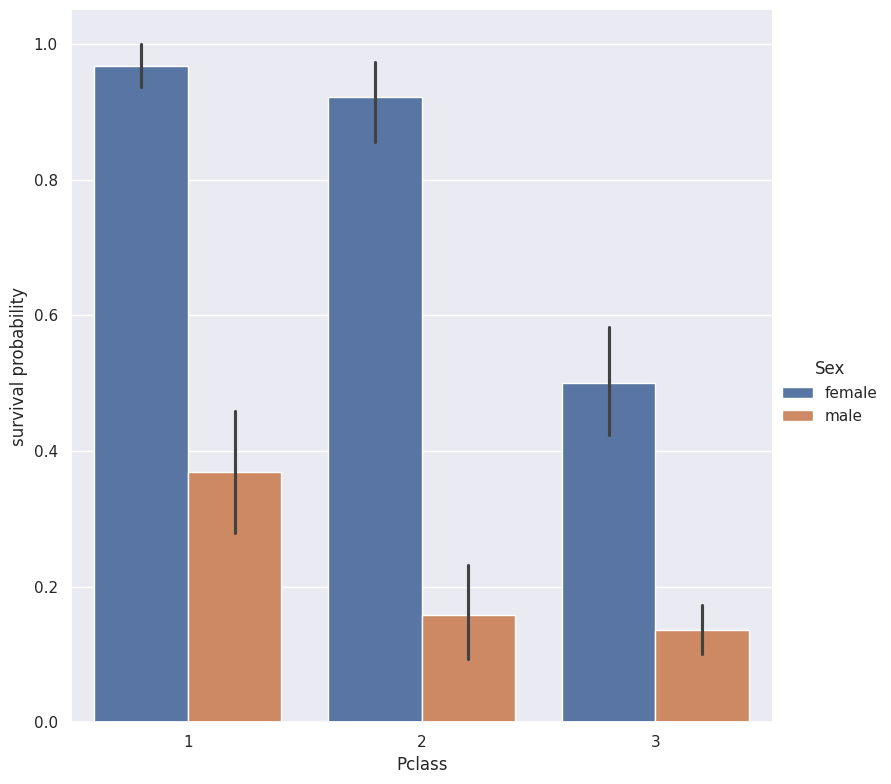

In [30]:
pclass = sns.catplot(x = "Pclass", y = "Survived", data = data, kind = "bar" , height= 8, hue ="Sex")
pclass = pclass.set_ylabels("survival probability")

### Embarked

In [31]:
data["Embarked"].isnull().sum()

2

In [32]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [33]:
data["Embarked"] = data["Embarked"].fillna("S")

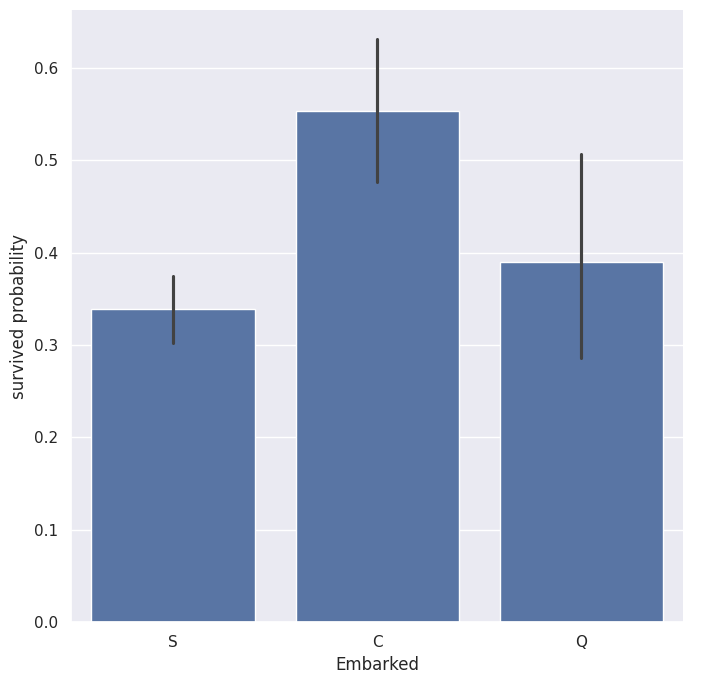

In [35]:
g = sns.catplot(x = "Embarked", y = "Survived" , data = data, height =7 , kind = "bar")
g= g.set_ylabels("survived probability")

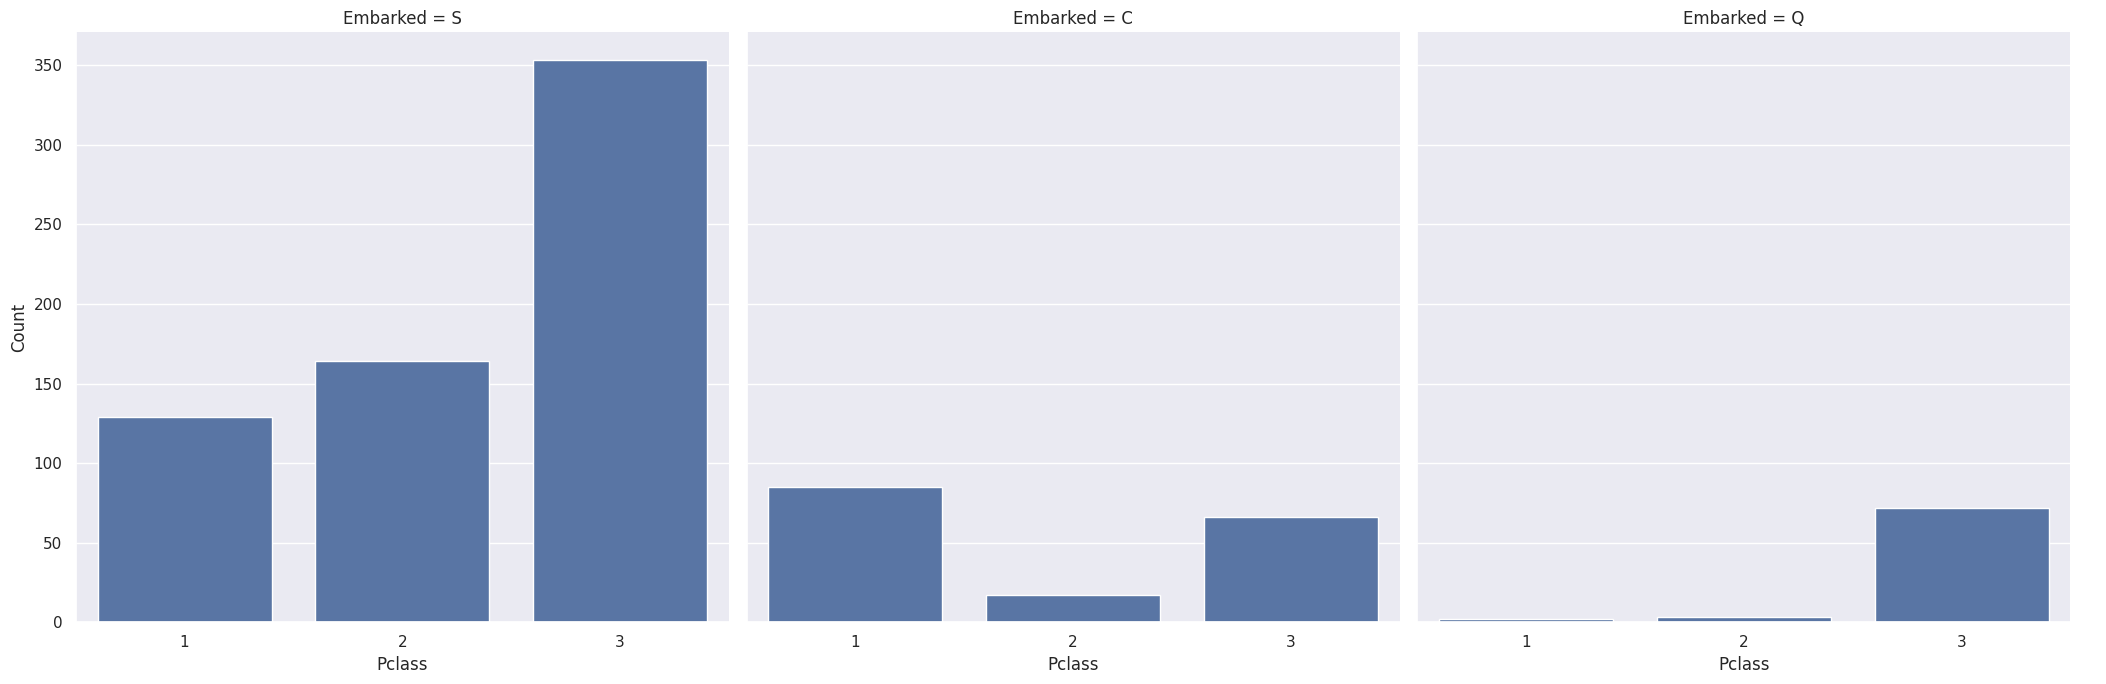

In [37]:
# Explore Pclass Vs Embarked
g = sns.catplot(data=data, x="Pclass", col="Embarked", kind="count", height=7)
g = g.set_ylabels("Count")

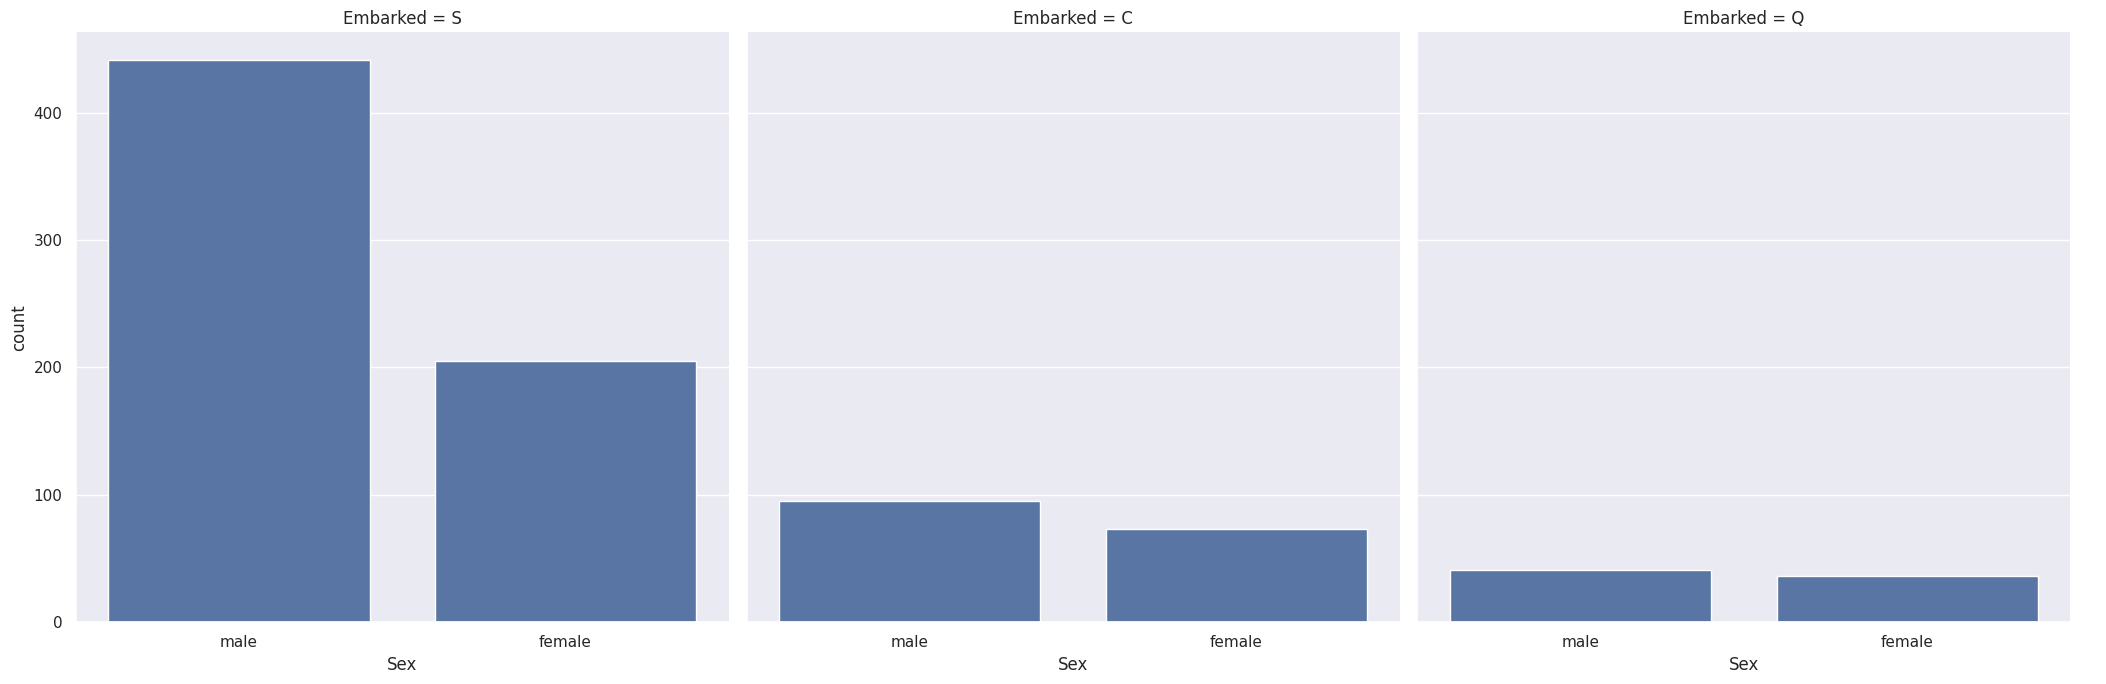

In [39]:
g = sns.catplot(data=data, x="Sex", col="Embarked", kind="count", height=7)

### Preparing data

In [40]:
data = pd.read_csv("titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
mean = data["Age"].mean()
std = data["Age"].std()

is_null = data["Age"].isnull().sum()

In [43]:
print(mean, std, is_null)

29.69911764705882 14.526497332334042 177


In [46]:
random_age = np.random.randint(mean-std, mean+std, size = is_null)
random_age
#type(random_age)

array([15, 25, 34, 27, 42, 42, 15, 30, 18, 31, 34, 38, 18, 21, 28, 30, 40,
       37, 39, 33, 32, 30, 16, 32, 40, 30, 43, 37, 40, 15, 17, 35, 15, 34,
       28, 36, 19, 43, 31, 24, 18, 42, 19, 22, 28, 17, 24, 23, 25, 26, 39,
       39, 31, 31, 20, 41, 30, 34, 34, 33, 43, 38, 27, 33, 32, 37, 24, 33,
       30, 27, 37, 28, 27, 33, 40, 26, 23, 38, 32, 35, 24, 33, 20, 17, 29,
       23, 23, 34, 15, 20, 36, 19, 28, 22, 27, 19, 22, 26, 29, 26, 40, 39,
       27, 23, 28, 21, 21, 19, 25, 20, 29, 26, 26, 35, 33, 37, 16, 38, 40,
       18, 36, 42, 32, 30, 36, 37, 24, 19, 30, 21, 36, 26, 34, 30, 39, 37,
       41, 33, 36, 24, 21, 34, 41, 37, 40, 35, 18, 21, 34, 30, 21, 39, 37,
       38, 36, 18, 19, 16, 35, 15, 33, 39, 38, 18, 26, 38, 41, 31, 15, 18,
       25, 28, 27, 34, 31, 23, 34])

In [48]:
a = data["Age"].copy()
a[np.isnan(a)] = random_age
data["Age"] = a

In [49]:
data["Age"].isnull().sum()

0

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
data["Embarked"] =  data["Embarked"].fillna("S")

In [52]:
col_to_drop = ["PassengerId", "Cabin", "Ticket", "Name"]
data.drop(col_to_drop, axis = 1, inplace = True)

In [53]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [54]:
genders = {"male": 0, "female": 1}
data["Sex"] = data["Sex"].map(genders)

In [55]:
ports = {"S": 0, "C" : 1, "Q": 2}

data["Embarked"] =  data["Embarked"].map(ports)

In [56]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


### Splitting the data

In [58]:
x= data.drop(data.columns[[0]], axis = 1)
y = data["Survived"]

In [59]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 0)

### Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest =  sc_x.transform(xtest)

### Classification

In [62]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier =  DecisionTreeClassifier()
knn_classifier =  KNeighborsClassifier()
rf_classifier =  RandomForestClassifier(n_estimators= 1000)

In [63]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000)

In [64]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [68]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [69]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ",round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ",round(dt_classifier_acc*100, 2)) 
print ("K-NN Classifier     : ",round(knn_classifier_acc*100, 2)) 
print ("Random Forest       : ",round(rf_classifier_acc*100, 2)) 

Logistic Regression :  79.85
Support Vector      :  80.97
Decision Tree       :  76.12
K-NN Classifier     :  82.46
Random Forest       :  82.09
